In [1]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph, START, END

In [7]:
class AgentState(TypedDict):
    num1:int
    op:str
    num2:int
    result:int

def router(state:AgentState) -> AgentState:
    '''Route Agent that decides which edge should be selected based on operation condition'''
    op = state['op']
    if op == '*':
        return "multiply_edge"
    elif op == '+':
        return "add_edge"
    
def adder(state:AgentState) -> AgentState:
    '''Adder node that adds two numbers'''
    state['result'] = state['num1'] + state['num2']
    return state

def multiplier(state:AgentState) -> AgentState:
    '''Multiplier node that multiplies two numbers'''
    state['result'] = state['num1'] * state['num2']
    return state

graph = StateGraph(AgentState)

graph.add_node('router', lambda state: state)
graph.add_node('adder', adder)
graph.add_node('multiplier', multiplier)

graph.add_edge(START, 'router')
graph.add_edge('adder', END)
graph.add_edge('multiplier', END)

graph.add_conditional_edges(
    'router',
    router,
    {
        'add_edge': 'adder',
        'multiply_edge': 'multiplier'
    }
)
app = graph.compile()

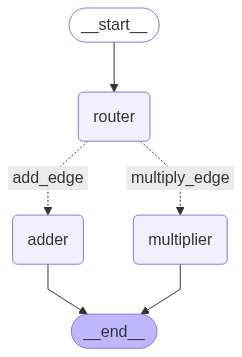

In [8]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [10]:
inp = AgentState(num1=10, op='+', num2=3)
result = app.invoke(inp)
result['result']

13